## Data Preparation

In [1]:
# Check System Version
import sys
print(sys.version)

3.12.3 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:41:55) [MSC v.1916 64 bit (AMD64)]


In [2]:
# Importing the NumPy and Pandas library with the alias 'np' with the alias 'pd'
import numpy as np  
import pandas as pd
# Importing the pyplot module from the Matplotlib library with the alias 'plt'
import matplotlib.pyplot as plt  
# Jupyter Notebook magic command to display Matplotlib plots inline
%matplotlib inline  
# Importing the Seaborn library with the alias 'sns'
import seaborn as sns  

In [3]:
df = pd.read_csv('Dataset/SupermarketData.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Business Understanding : 

### BackGround

The dataset represents sales transactions from a supermarket spanning from January 1st, 2019 to March 30th, 2019. It contains information about customer demographics, products sold, pricing, and payment details. Understanding this data can provide valuable insights into sales performance, customer behavior, and product popularity. By analyzing this dataset, businesses can optimize their strategies, enhance customer experiences, and drive revenue growth.


### Main Question :

1. Which cities are the top performers in terms of sales?
2. What are the most common payment methods used by customers?
3. What types of products do people buy the most by gender?
4. Which product lines are the best-selling?
5. Which types of customers generate the most revenue?

## Data Understanding :

In [4]:
# Check Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**For the Dataset you can click the link => [Dataset Source](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales )**

## Data Cleansing :

In [5]:
# Missing Values

By checking the information from the data in the dataset used, it is known that there are no missing values , so no data imputation is performed on the dataset used.

In [6]:
# Check Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Changed the data type 'Date' from object to datetime64 to facilitate time-based analysis.


In [7]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

Setting the DataFrame index to the 'Date' column enables more efficient access and analysis of time-based data.

In [8]:
df.set_index('Date',inplace =True)

In [9]:
# Check the Result of Data Cleansing
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 to 2019-02-18
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Exploratory Data Analysis:

### Which cities are the top performers in terms of sales?

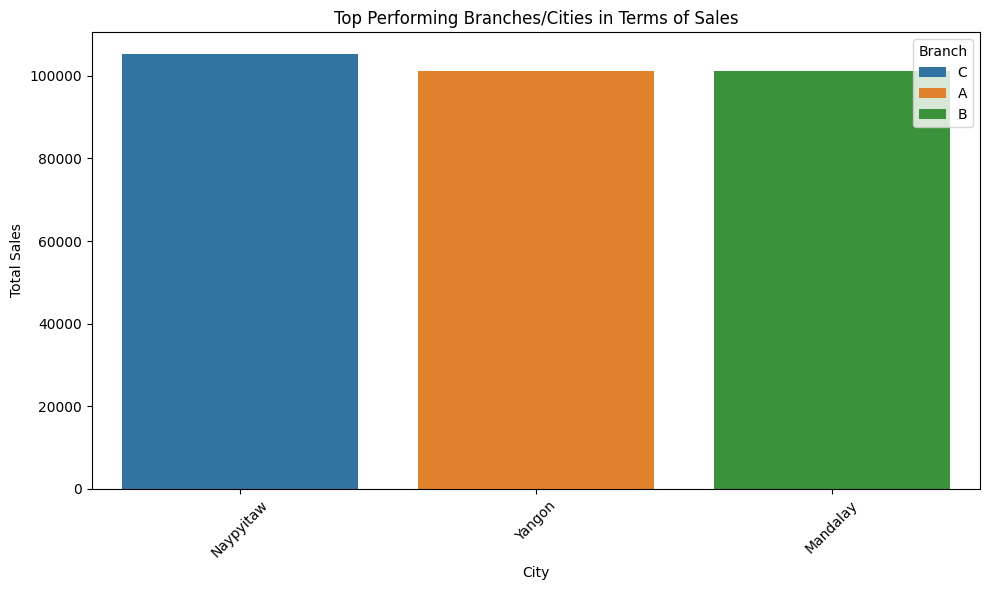

  Branch       City  Total Spending
0      A     Yangon       101143.21
1      B   Mandalay       101140.64
2      C  Naypyitaw       105303.53


In [10]:
# Calculate sales (unit price * quantity)
df['Total Spending'] = df['Unit price'] * df['Quantity']

# Group the data by branch and city, then calculate the total sales for each
branch_city_sales = df.groupby(['Branch', 'City'])['Total Spending'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
branch_city_sales_sorted = branch_city_sales.sort_values(by='Total Spending', ascending=False)

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=branch_city_sales_sorted, x='City', y='Total Spending', hue='Branch')
plt.title('Top Performing Branches/Cities in Terms of Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display data numeric
print(branch_city_sales)

### What are the most common payment methods used by customers?

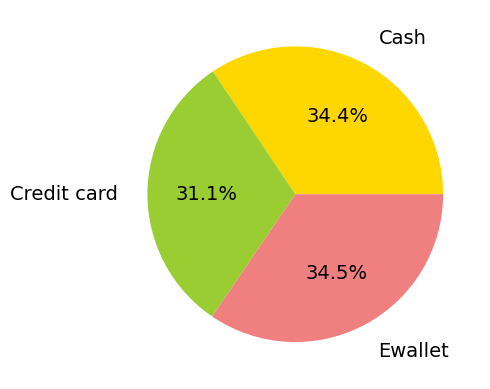

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Invoice ID, dtype: int64


In [11]:
# transaction per payment type 
transaction_per_payment_type = df.groupby('Payment')['Invoice ID'].count()

# Define colors
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(transaction_per_payment_type, labels=transaction_per_payment_type.index, autopct="%1.1f%%", colors=colors, labeldistance=1.2, textprops={'fontsize': 14})
plt.show()

print(transaction_per_payment_type)

### What types of products do people buy the most by gender?

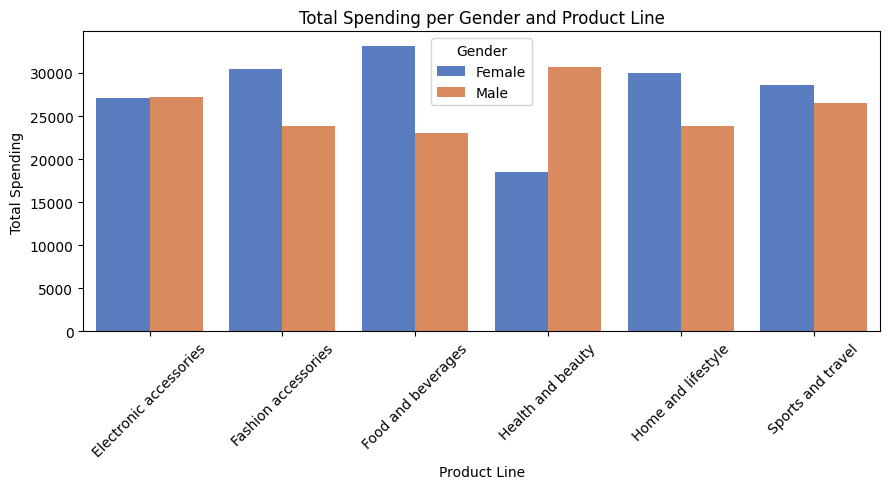

In [12]:
total_spending_per_gender = df.groupby(['Gender', 'Product line'])['Total'].sum().reset_index()


plt.figure(figsize=(9,5))
sns.barplot(data=total_spending_per_gender, x='Product line', y='Total', hue='Gender', palette='muted')
plt.xlabel('Product Line')
plt.ylabel('Total Spending')
plt.title('Total Spending per Gender and Product Line')
plt.xticks(rotation=45) 
plt.legend(title='Gender')
plt.tight_layout()  
plt.show()

### Which product lines are the best-selling?

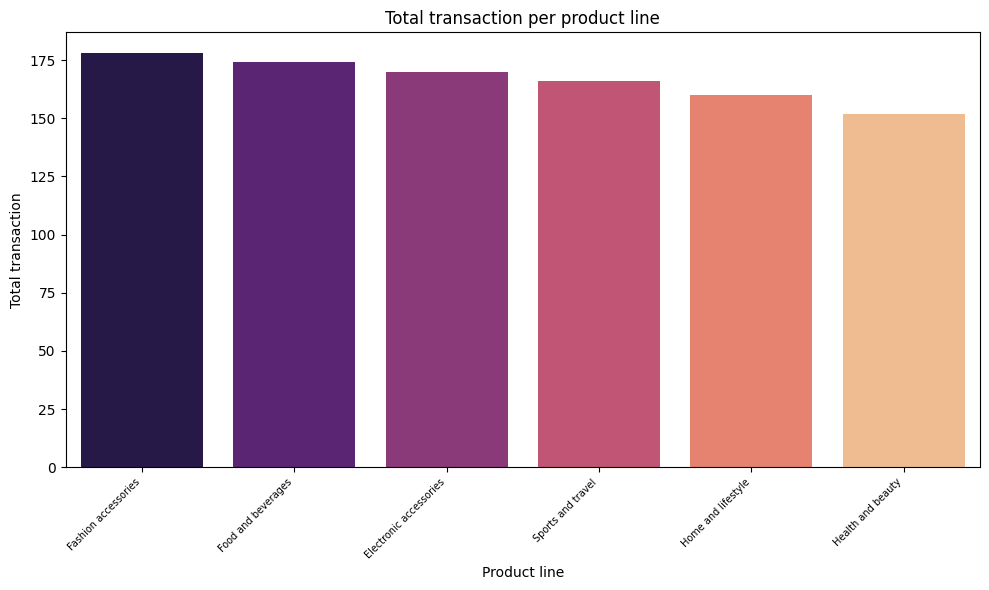

             Product line  Invoice ID
1     Fashion accessories         178
2      Food and beverages         174
0  Electronic accessories         170
5       Sports and travel         166
4      Home and lifestyle         160
3       Health and beauty         152


In [13]:
# Assuming your DataFrame is named 'df'
product_line = df.groupby('Product line')['Invoice ID'].count().reset_index()
sorted_product_lines = product_line.sort_values(by='Invoice ID', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_product_lines, x="Product line", y="Invoice ID", hue="Product line", palette='magma', legend=False)
plt.xticks(rotation=45, fontsize=7, ha='right')
plt.xlabel('Product line')
plt.ylabel('Total transaction')
plt.title('Total transaction per product line')
plt.tight_layout()
plt.show()

print(sorted_product_lines)

### Which customer type is the most spending?

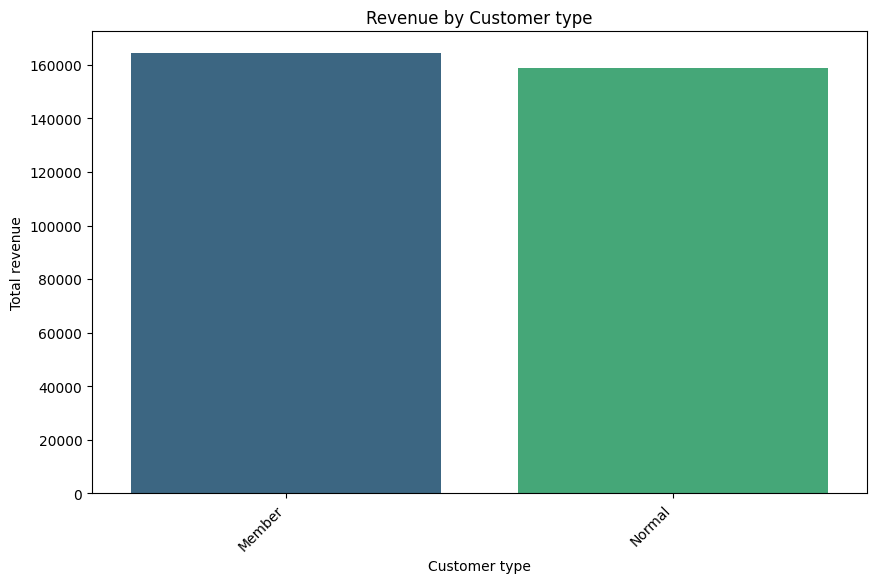

Total Spending by Customer Type:
  Customer type       Total
0        Member  164223.444
1        Normal  158743.305


In [14]:
customer_type_revenue = df.groupby('Customer type')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Customer type', y='Total', data=customer_type_revenue, palette='viridis', hue='Customer type', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Revenue by Customer type')
plt.xlabel('Customer type')
plt.ylabel('Total revenue')
plt.show()

# Display numeric data
print("Total Spending by Customer Type:")
print(customer_type_revenue)

## Summary

1. Naypyitaw leads in sales, indicating market dominance.
2. E-wallets are growing, cash remains popular, and credit card use is low.
3. Gender-specific preferences: men favor "Food and Beverage," women prefer "Health and Beauty."
4. Fashion accessories and food/beverages are top sellers.
5. Revenue is primarily driven by members, underscoring the importance of loyalty programs.